#### Check Duplicate Records

#### Drop Duplicate Records

#### Check missing or null values

#### Drop missing or null values

#### Show top 10 average MSRP (Price) per car brand (rounded figure)?

#### Show the average MSRP (price) per years (rounded figure)?

#### Show average Engine HP (power) rounded figure and MPG (efficiency) rounded figure per year?

Hint: Average of (city mpg + highway MPG)

#### What percentage of cars are Compact, Midsize, or Large?

#### Which vehicle styles are the most sold (most common) in the dataset?

#### Which car brands have the most vehicles priced at $40,000 or more and with a popularity score of at least 1000?

#### Check if there are outliers in Engine HP show boxplot

#### Check if there are outliers in Engine Cylinder show boxplot

#### Find upper bound, lower bound, number of outliers in Engine HP

#### Fill missing values in Number of Doors column with median value then check if values are filled

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Copy of cars.xlsx")
print("Data Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

Data Loaded Successfully!
Shape: (11914, 16)

Columns:
 Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


In [3]:
duplicates = df.duplicated().sum()
print("\nNumber of duplicate records:", duplicates)


Number of duplicate records: 715


In [4]:
avg_msrp_per_year = df.groupby("Year")["MSRP"].mean().round()
print("\nAverage MSRP per Year:")
print(avg_msrp_per_year)


Average MSRP per Year:
Year
1990     2020.0
1991     2081.0
1992     2078.0
1993     2187.0
1994     2312.0
1995     2607.0
1996     2497.0
1997     3105.0
1998     2976.0
1999     3096.0
2000     3167.0
2001    41501.0
2002    33744.0
2003    39774.0
2004    36107.0
2005    36747.0
2006    32056.0
2007    34974.0
2008    54139.0
2009    49839.0
2010    50642.0
2011    57548.0
2012    59516.0
2013    48699.0
2014    63226.0
2015    46794.0
2016    47221.0
2017    42192.0
Name: MSRP, dtype: float64


In [5]:
df["Average_MPG"] = (df["city mpg"] + df["highway MPG"]) / 2
avg_hp_mpg = df.groupby("Year")[["Engine HP", "Average_MPG"]].mean().round()
print("\nAverage Engine HP and MPG per Year:")
print(avg_hp_mpg)


Average Engine HP and MPG per Year:
      Engine HP  Average_MPG
Year                        
1990      141.0         20.0
1991      148.0         19.0
1992      151.0         21.0
1993      156.0         21.0
1994      157.0         21.0
1995      175.0         20.0
1996      174.0         21.0
1997      185.0         19.0
1998      190.0         19.0
1999      189.0         20.0
2000      183.0         21.0
2001      194.0         21.0
2002      196.0         20.0
2003      206.0         20.0
2004      215.0         20.0
2005      219.0         20.0
2006      230.0         20.0
2007      252.0         19.0
2008      256.0         20.0
2009      252.0         21.0
2010      249.0         21.0
2011      263.0         22.0
2012      266.0         23.0
2013      267.0         24.0
2014      292.0         25.0
2015      271.0         25.0
2016      274.0         25.0
2017      275.0         25.0


In [6]:
size_counts = df["Vehicle Size"].value_counts()
total_cars = len(df)
sizes = ["Compact", "Midsize", "Large"]

size_percentages = {}
for s in sizes:
    count = df["Vehicle Size"].str.contains(s, case=False, na=False).sum()
    size_percentages[s] = round((count / total_cars) * 100, 2)

print("\nPercentage of Compact, Midsize, Large Cars:")
for k, v in size_percentages.items():
    print(f"{k}: {v}%")


Percentage of Compact, Midsize, Large Cars:
Compact: 39.99%
Midsize: 36.7%
Large: 23.31%


In [7]:
most_common_styles = df["Vehicle Style"].value_counts().head(10)
print("\nMost Common Vehicle Styles:")
print(most_common_styles)



Most Common Vehicle Styles:
Vehicle Style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Name: count, dtype: int64


In [8]:
filtered_brands = df[(df["MSRP"] >= 40000) & (df["Popularity"] >= 1000)]
brand_counts = filtered_brands["Make"].value_counts().head(10)
print("\nBrands with MSRP >= 40,000 and Popularity >= 1000:")
print(brand_counts)


Brands with MSRP >= 40,000 and Popularity >= 1000:
Make
Cadillac     354
BMW          276
Audi         224
Chevrolet    216
Ford         145
Toyota       131
Porsche      123
Nissan        91
Ferrari       69
Dodge         58
Name: count, dtype: int64


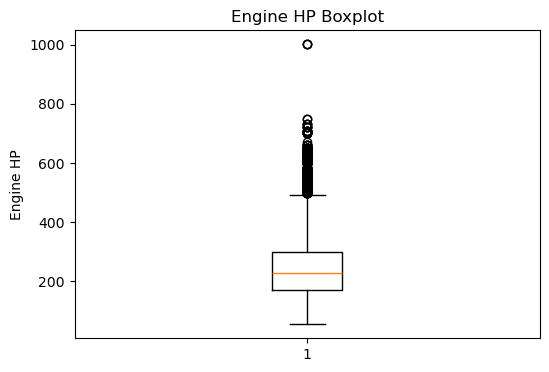

In [9]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["Engine HP"].dropna())
plt.title("Engine HP Boxplot")
plt.ylabel("Engine HP")
plt.show()

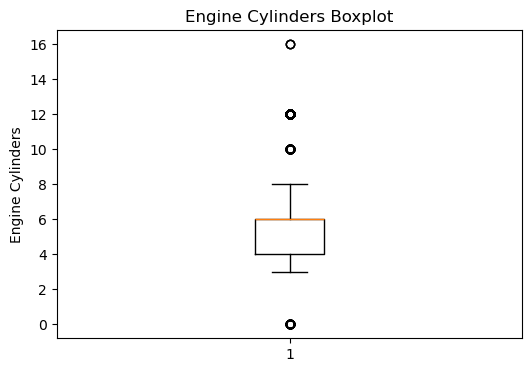

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(df["Engine Cylinders"].dropna())
plt.title("Engine Cylinders Boxplot")
plt.ylabel("Engine Cylinders")
plt.show()

In [11]:
print("\nMissing values in 'Number of Doors' before fill:", df["Number of Doors"].isna().sum())
median_doors = int(df["Number of Doors"].median())
df["Number of Doors"].fillna(median_doors, inplace=True)
print("Missing values after fill:", df["Number of Doors"].isna().sum())



Missing values in 'Number of Doors' before fill: 6
Missing values after fill: 0


C:\Users\Umar Shahzad\AppData\Local\Temp\ipykernel_8452\3030998660.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Number of Doors"].fillna(median_doors, inplace=True)


In [12]:
df.to_csv("cars_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'cars_cleaned.csv'")


Cleaned dataset saved as 'cars_cleaned.csv'


In [13]:
Q1 = df["Engine HP"].quantile(0.25)
Q3 = df["Engine HP"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Engine HP"] < lower_bound) | (df["Engine HP"] > upper_bound)]
print("\nEngine HP Outlier Analysis:")
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", outliers.shape[0])



Engine HP Outlier Analysis:
Q1: 170.0
Q3: 300.0
IQR: 130.0
Lower Bound: -25.0
Upper Bound: 495.0
Number of Outliers: 509
